In this notebook, we introduce:

- **Linear Regression** as __single layer, single neuron model__ to motivate the introduction of Neural Networks as Universal Approximators that are modeled as collections of neurons connected in an acyclic graph

- Loss/Error functions, Gradient Decent, Backpropagation, etc

- Neural Network with hands on Tensorflow Implementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-11-14 20:26:53.700256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 20:26:53.701580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 20:26:53.707468: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 20:26:55.204664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# One Neuron Neural Network

We're going to model a straight line Linear Regression (i.e fitting to $y = mx +b$) as a 1 neuron NN. First let's generate some noisy data that we'll try to fit to using our one neuron neural network (a.k.a Linear Regression) 

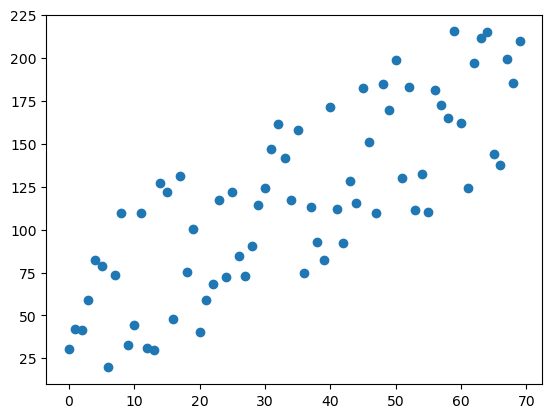

In [2]:
X = np.arange(0,70, 1)
Y = 2*X
noise = 100*np.random.rand(70) 
Y = Y + noise

plt.scatter(X, Y)
plt.show()

The parameters of our network are the number m and b which we randomly initiate, and prediction is give by:

\begin{align}
\ \tilde{y_i} &= mx_i + b \\
\end{align}


For the loss function we use the standard Mean Squared Error:

\begin{align}
\ L & = \frac{1}{N} \sum_{k=1}^N (y_k - \tilde{y_k})^2 \\
\end{align}


The Batch Gradient Decent step is given by (_notice we are using the entire dataset as a batch_):

\begin{align}
\ m &= m - \alpha \frac{dL}{dm} \\
\ b &= b - \alpha \frac{dL}{db} \\
\end{align}

where $\alpha$ is the learning rate, and the gradients are given by: 

\begin{align}
\ \frac{dL}{dm} &= -\frac{2}{N} \sum_{k=1}^N x_k(y_k - \tilde{y_k})\\
\end{align}
\begin{align}
\ \frac{dL}{db} &= -\frac{2}{N} \sum_{k=1}^N (y_k - \tilde{y_k})\\
\end{align}

Random guess for m and b: (array([1.22726864]), array([0.31352411]))


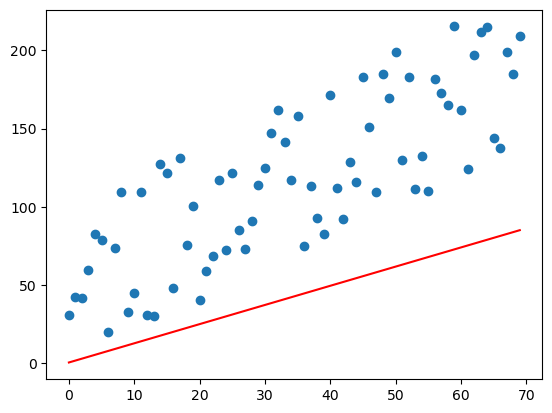

In [3]:
m = np.random.randn(1)
b = np.random.randn(1)
print(f'Random guess for m and b:',(m,b))

# Initial random prediction
Y_pred = m*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

In [4]:
alpha = 0.0001                             # The learning Rate
epochs = 10000                             # The number of iterations to perform gradient descent

n = float(len(X))                          # Number of elements in X

# Training the Neural Net
for i in range(epochs): 
    Y_pred = m*X + b                       # The current predicted value of Y
    Loss = sum((Y - Y_pred )**2)/n         # Compute loss
    D_m = (-2/n) * sum(X * (Y - Y_pred))   # Derivative wrt m
    D_b = (-2/n) * sum(Y - Y_pred)         # Derivative wrt b
    m = m - alpha * D_m                    # Update m
    b = b - alpha * D_b                    # Update b
    
    if i%1000 == 0:
        print( "Epoch {}, Loss : {}".format(i, Loss))
print( "Epoch {}, Loss : {}".format(i, Loss))

Epoch 0, Loss : 6935.119148337922
Epoch 1000, Loss : 1476.9310100365528
Epoch 2000, Loss : 1429.6794506775057
Epoch 3000, Loss : 1387.0147307369964
Epoch 4000, Loss : 1348.4915930396674
Epoch 5000, Loss : 1313.7080027543766
Epoch 6000, Loss : 1282.3009516818252
Epoch 7000, Loss : 1253.9426698315735
Epoch 8000, Loss : 1228.337204751757
Epoch 9000, Loss : 1205.2173329126979
Epoch 9999, Loss : 1184.3615997852885


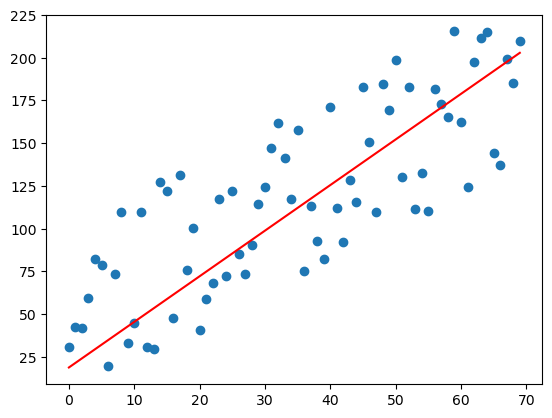

In [5]:
# Making predictions
Y_pred = m*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

## Neural Networks

An example of a singe _layer_ neural net
<img src='http://cs231n.github.io/assets/imagemap.jpg' alt="multiple dimensions" style="width: 400px;">

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" alt="nn" style="width: 400px;"/>

Neural Networks are modeled as collections of neurons that are connected in an acyclic graph. In other words, the outputs of some neurons can become inputs to other neurons. Cycles are not allowed since that would imply an infinite loop in the forward pass of a network. Instead of an amorphous blobs of connected neurons, Neural Network models are often organized into distinct layers of neurons. For regular neural networks, the most common layer type is the fully-connected layer in which neurons between two adjacent layers are fully pairwise connected, but neurons within a single layer share no connections. [See: cs231n](http://cs231n.github.io/neural-networks-1/)


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

Building blocks:

- **Loss Function**: We can measure the accuracy of our hypothesis function by using a cost function. This takes an average of all the results of the hypothesis with inputs from x's compared to the actual output y's. The goal is to minimize this loss/error.



- **Gradient Decent** and **Learning Rate**: So we have our hypothesis function (Neural Net) and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in hypothesis function (Weights of the Neural Net). The way we do this is by taking the derivative of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent, and the size of each step is determined by the parameter α, which is called the learning rate.


- **Backpropagation**: Chain rule from calculus 101 applied to multi-layer neural network (i.e. gradient propagated backwards through the layers). An __n layer neural network__ can simply be seen as:
    
    \begin{align}
    \ \tilde{y_i} &= f_n(W_n... f_2(W_2 f_1(W_1 X))) \\
    \end{align}
    
    where $f_1, f_2, ... f_n$ are the activation functions at each layer, $W_1, W_2, ... W_n$ are matrices of parameters at each layer, and $X$ is the input. Hence to find the gradient of the loss function w.r.t to any parameter one simply needs to apply the chain rule.




- **Optimizer**: Different flavors of gradient decent (more on this later). 


- **Activation Function**: Some non-linear function applied to intermediate layer's outputs before feeding into the next layer.

## 1. Defining Custom Layers 

The fundamental data structure in neural networks is the layer. A Layer is an object that encapsulates some state (weights) and some computation (a forward pass). 

`tf.keras.layers.Layer` is the base class of all Keras layers, and it inherits from `tf.Module`

### a)  Define a Layer

In [6]:
class MyDense(tf.keras.layers.Layer):
    # Adding **kwargs to support base Keras layer arguments
    def __init__(self, in_features, out_features, **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.w = tf.Variable(
          tf.random.normal([in_features, out_features]), name='w')
        self.b = tf.Variable(tf.zeros([out_features]), name='b')
    
    def call(self, x):
        y = tf.matmul(x, self.w) + self.b
        return y #tf.nn.relu(y)


In [7]:
# Instantiate your layer

simple_layer = MyDense(name="simple", in_features=2, out_features=4)


# Call the layer on a sample input

x = tf.random.normal((4,2))
y = simple_layer(x)

print(y)

2023-11-14 20:27:56.500319: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43449 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:85:00.0, compute capability: 8.6


tf.Tensor(
[[-0.4103132   0.9321318  -0.21966162  1.1834459 ]
 [-0.71989334  0.7869916  -0.60518557  0.6700585 ]
 [ 0.7468067  -2.0760293   0.30150136 -2.782951  ]
 [ 0.06237604 -0.5953177  -0.08411779 -0.93178463]], shape=(4, 4), dtype=float32)


### b) Build Method 

It is often convenient to delay creating variables until the input shape is fixed.

In [8]:
class MyDense(tf.keras.layers.Layer):
    
    def __init__(self, units=32, **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = tf.Variable(tf.random.normal([input_shape[-1], self.units]), name='w')
        self.b = tf.Variable(tf.zeros([self.units]), name='b')

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [9]:
# Instantiate your layer

flexible_layer = MyDense(name="simple", units=4)


# Call the layer on a sample input

x = tf.random.normal((2,2))
y = flexible_layer(x)

print(y)

tf.Tensor(
[[ 0.05530214  0.41119492 -2.7407815  -0.6861725 ]
 [ 1.6483613   2.0318537  -0.82207036  0.22242032]], shape=(2, 4), dtype=float32)


In [10]:
# At this point we can inspect the variable

flexible_layer.variables

[<tf.Variable 'simple/w:0' shape=(2, 4) dtype=float32, numpy=
 array([[-1.483291  , -1.763463  ,  0.22628215, -0.33141476],
        [-0.598534  , -0.56034577, -1.1049579 , -0.43955934]],
       dtype=float32)>,
 <tf.Variable 'simple/b:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [11]:
# We can also call the variables by name

flexible_layer.b

<tf.Variable 'simple/b:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

### c) Non-trainable weights 

By default, the variables in a layer are trainable, i.e. they will tracked by the Gradient Tape and will be updated during backpropagation. However, we can also specify certain weights to be non-trainable.

In [12]:
class MyDense(tf.keras.layers.Layer):
    
    def __init__(self, units=32, **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = tf.Variable(tf.random.normal([input_shape[-1], self.units]), name='w', trainable=True)
        self.b = tf.Variable(tf.zeros([self.units]), name='b', trainable=False)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [13]:
# Instantiate the layer

my_new_layer = MyDense(units=16)

x = tf.random.normal((2,2))
y = my_new_layer(x)

y.shape

TensorShape([2, 16])

In [14]:
print("weights:", len(my_new_layer.weights))
print("non-trainable weights:", len(my_new_layer.non_trainable_weights))


# It's not included in the trainable weights:
print("\n trainable_weights:", my_new_layer.trainable_weights)
print("\n non trainable_weights:", my_new_layer.non_trainable_weights)

weights: 2
non-trainable weights: 1

 trainable_weights: [<tf.Variable 'my_dense/w:0' shape=(2, 16) dtype=float32, numpy=
array([[-1.4525794 , -0.3122924 ,  1.4506344 , -1.0620842 , -0.5210984 ,
        -0.00487629,  1.1508207 , -0.9093174 , -1.0990711 ,  0.25112945,
        -0.71665657, -0.5103166 ,  1.415609  , -0.15974072,  0.26075795,
         0.15218522],
       [ 0.8813454 ,  0.54832375,  2.0843441 ,  1.7651441 , -0.09750167,
         0.72796625,  1.962532  , -2.156562  ,  0.27178943,  0.46478748,
        -0.34829742,  0.2484972 ,  0.6718748 , -1.3418236 , -0.95342946,
         2.4158256 ]], dtype=float32)>]

 non trainable_weights: [<tf.Variable 'my_dense/b:0' shape=(16,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>]


### d) training arg in call()  

In [15]:
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

In [16]:
dropuout = CustomDropout(rate=0.5)

x = tf.random.normal((2,2))
print('input: ', x)


# During training
output_during_training = dropuout(x, training=True)
print('\n output_during_training: ', output_during_training)


# During inference
output_during_inference = dropuout(x, training=False)
print('\n output_during_inference: ', output_during_inference)

input:  tf.Tensor(
[[1.784234  0.8642287]
 [0.7713688 1.5036184]], shape=(2, 2), dtype=float32)

 output_during_training:  tf.Tensor(
[[0.        1.7284575]
 [0.        3.0072367]], shape=(2, 2), dtype=float32)

 output_during_inference:  tf.Tensor(
[[1.784234  0.8642287]
 [0.7713688 1.5036184]], shape=(2, 2), dtype=float32)


### e) Recursively composible  

It also possible to compose a layer out of other layers. The outer layer will automatically track the weights of the inner layer.

In [17]:
# Let's assume we are reusing the Linear class
# with a `build` method that we defined above.


class MLPBlock(tf.keras.layers.Layer):
    def __init__(self):
        super(MLPBlock, self).__init__()
        self.dense_1 = MyDense(32)
        self.dense_2 = MyDense(32)
        self.dense_3 = MyDense(1)

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = tf.nn.relu(x)
        x = self.dense_2(x)
        x = tf.nn.relu(x)
        return self.dense_3(x)


mlp = MLPBlock()
y = mlp(tf.ones(shape=(3, 64)))  # The first call to the `mlp` will create the weights
print("weights:", len(mlp.weights))
print("trainable weights:", len(mlp.trainable_weights))
print("y.shape: ", y.shape)

weights: 6
trainable weights: 3
y.shape:  (3, 1)


## 2. Defining Models: Three Levels of abstraction

Given a set of (either predefined or custom defined) layers, we can begin to start composing them into a DAG to define a model. A `tf.keras.Model` is similar to a `tf.keras.layers.Layer` except that models come with extra functionality that make them easy to train, evaluate, load, save, and even train on multiple machines.

### a) Sequential

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [18]:
# There are two ways to define a sequential model:

# 1. Either as a list of layers

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(32),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(16),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(1)
    ]
)


# 2. Or instantiate a Sequential Model and add layers by calling the .add() method on it
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(4,)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(1))

In [19]:
# Now we can call the model on an Input Tensor
x = tf.ones((16, 4))
y = model(x)

print(y.shape)

(16, 1)


In [20]:
# We can call summary method to display the graph
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 re_lu_2 (ReLU)              (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 re_lu_3 (ReLU)              (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### b) Functional API 

The __Functional API__ is more flexible than Sequential, and specifically come in handy when the model has non-linear topology, shared layers and/or multiple inputs, outputs.

First, lets redefine the above model in Functional API.

In [21]:
inputs = tf.keras.Input(shape=(4,))

x = tf.keras.layers.Dense(32)(inputs)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(16)(x)
x = tf.keras.layers.ReLU()(x)

outputs = tf.keras.layers.Dense(1)(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs, name="functional_model")

In [22]:
model.summary()

Model: "functional_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 re_lu_4 (ReLU)              (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 re_lu_5 (ReLU)              (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 

With Functional API, it's easy to define more complex topologies. Lets define a model with multiple inputs and outputs.

Let's say we want a model that takes in a few weather data variables on any given day to predict temperature and humidity for the same day:

Inputs:

- Pressure
- Precipitation
- Clouds
- Wind


Outputs:

- Temperature
- Humidity

In [23]:
# Now lets build this model

pressure_input = tf.keras.layers.Input(shape=(1,), name='pressure')
precipitation_input = tf.keras.layers.Input(shape=(1,), name='precipitation')
clouds_input = tf.keras.layers.Input(shape=(1,), name='clouds')
wind_input = tf.keras.layers.Input(shape=(1,), name='wind')


# Lets pass the pressure and precipitaion through a one stack of linear layers, and clouds and wind through another
x = tf.keras.layers.concatenate([pressure_input, precipitation_input])
x = tf.keras.layers.Dense(units=32, activation='relu')(x)
x = tf.keras.layers.Dense(units=16, activation='relu')(x)


y = tf.keras.layers.concatenate([clouds_input, wind_input])
y = tf.keras.layers.Dense(units=32, activation='relu')(y)
y = tf.keras.layers.Dense(units=16, activation='relu')(y)


# Lets merge the two branches and send through a few more layers
z = tf.keras.layers.concatenate([x,y])
z = tf.keras.layers.Dense(units=32, activation='relu')(z)
z = tf.keras.layers.Dense(units=16, activation='relu')(z)

# Finally split again into two outputs
temperature = tf.keras.layers.Dense(units=1, name='temperature')(z)
humidity = tf.keras.layers.Dense(units=1, name='humidity')(z)


multiple_inp_model = tf.keras.Model(inputs=[pressure_input, precipitation_input, clouds_input, wind_input], 
                       outputs=[temperature, humidity], name="multi_input_output_model")

In [24]:
# We can print the summary but it might be difficult to visualize the graph
multiple_inp_model.summary()

Model: "multi_input_output_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 pressure (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 precipitation (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 clouds (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 wind (InputLayer)           [(None, 1)]                  0         []                            
                                                                           

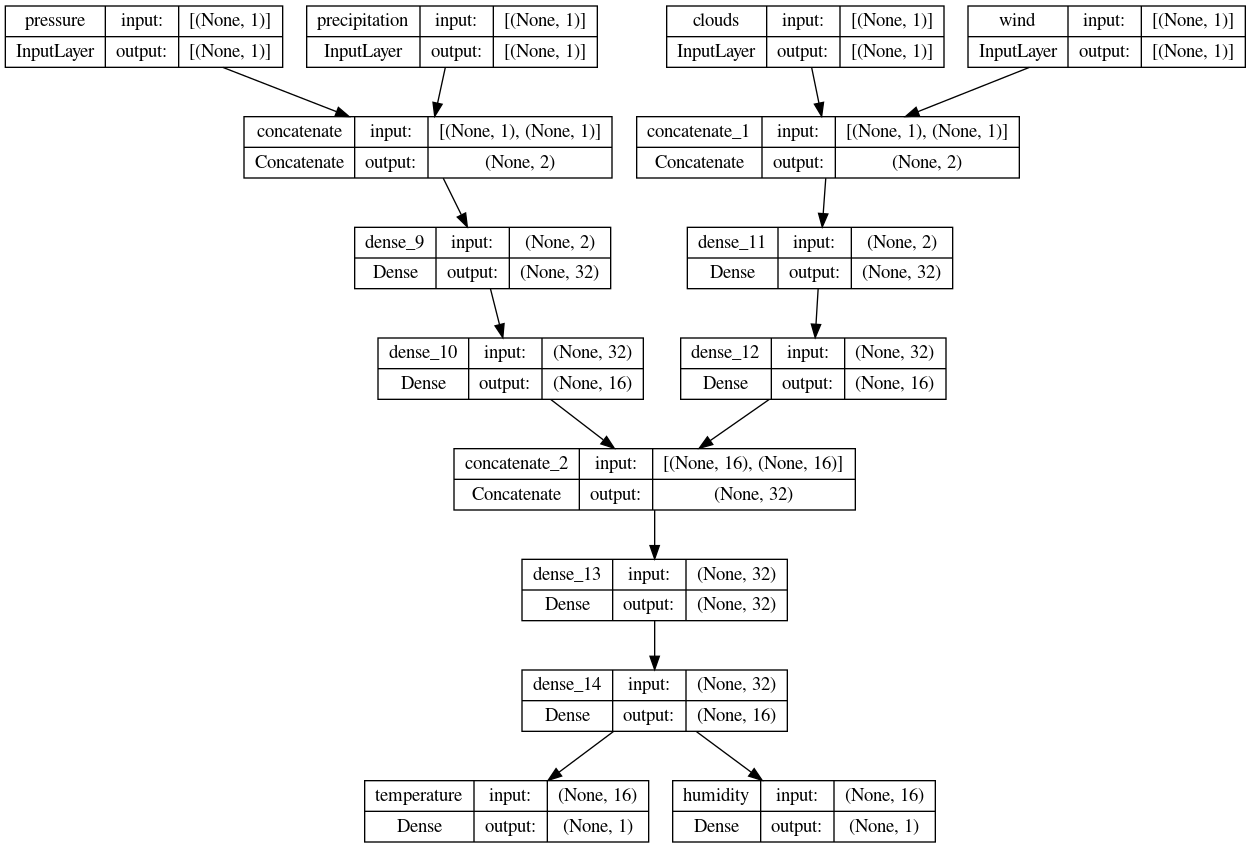

In [25]:
# Luckily we can also plot the model
tf.keras.utils.plot_model(multiple_inp_model, show_shapes=True)

### c) Subclassing 

In [26]:
class FCN(tf.keras.Model):

    def __init__(self):
        super(FCN, self).__init__()
        self.dense_1 = tf.keras.layers.Dense(32)
        self.dense_2 = tf.keras.layers.Dense(16)
        self.dense_3 = tf.keras.layers.Dense(1)
        self.relu = tf.keras.layers.ReLU()


    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.relu(x)
        x = self.dense_2(x)
        x = self.relu(x)
        return self.dense_3(x)

In [27]:
model = FCN()


# Call the model on an Input Tensor
x = tf.ones((16, 4))
y = model(x)

print(y.shape)

(16, 1)


In [28]:
# Print summary

model.summary()

Model: "fcn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            multiple                  160       
                                                                 
 dense_16 (Dense)            multiple                  528       
                                                                 
 dense_17 (Dense)            multiple                  17        
                                                                 
 re_lu_6 (ReLU)              multiple                  0         
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Training: Three Levels of abstraction

For this exercise, we will fix the model architecture (a small CNN) and train it on the MNIST dataset. 

In [46]:
# Prepare Dataset

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

train_images, val_images = train_images[:50000], train_images[50000:]
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

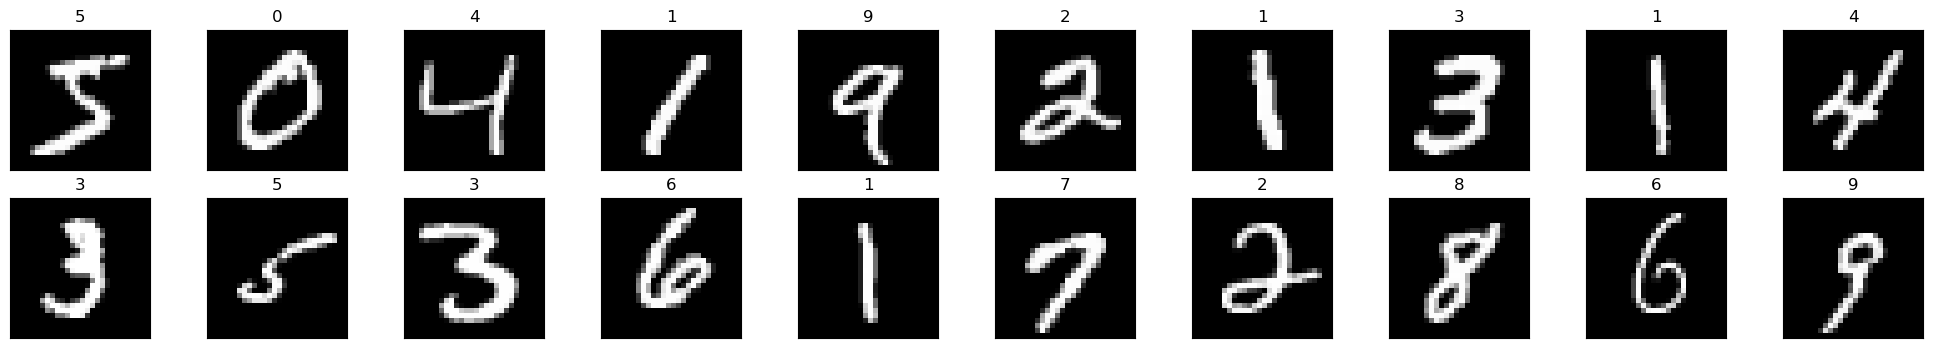

In [47]:
# obtain one batch of training images
images, labels = train_images[:20], train_labels[:20]


# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(np.argmax(labels[idx])))

In [30]:
# Define Model
from tensorflow.keras import layers

Input = tf.keras.layers.Input(shape=(28,28,1))

x = layers.Conv2D(32, (3, 3), activation='relu')(Input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

Output = layers.Dense(10, activation='softmax')(x)

my_CNN = tf.keras.Model(inputs=Input, outputs=Output)
my_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

### a) Model.fit() method 

To use the built in methods `(Model.fit(), Model.evaluate(), Model.predict() `, we simply need to specify the
- optimizer: 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- loss:
https://www.tensorflow.org/api_docs/python/tf/keras/losses
- metrics: 
https://www.tensorflow.org/api_docs/python/tf/keras/metrics

and compile the model.

In [31]:
my_CNN.compile(
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(),
    # Loss function to minimize
    loss = tf.keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics = [tf.keras.metrics.CategoricalAccuracy()],
)

The `.fit()` method will accept `numpy arrays`, `tf.data.Dataset` objects and `data generators`. Here we will input the MNIST data as a numpy array.

The `.fit()` method can slice the data into batches, and will iterate over the entire dataset for a given number of epochs. Additionally, after each epoch it will evaluate on a hold-out validation set if specified.

In [32]:
history = my_CNN.fit(
    train_images,
    train_labels,
    batch_size=64,
    epochs=2,
    validation_data=(val_images, val_labels),
)

Epoch 1/2


2023-11-14 20:28:09.458106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8900
2023-11-14 20:28:13.353840: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7e65d570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-14 20:28:13.353875: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-11-14 20:28:13.600850: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-14 20:28:14.765102: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 [==============================] - 16s 3ms/step - loss: 0.2126 - categorical_accuracy: 0.9348 - val_loss: 0.0793 - val_categorical_accuracy: 0.9767
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0573 - categorical_accuracy: 0.9820 - val_loss: 0.0610 - val_categorical_accuracy: 0.9814


The returned history object holds a record of the loss and metric values recorded at the end of each epoch during training:

In [33]:
history.history

{'loss': [0.21262842416763306, 0.057336002588272095],
 'categorical_accuracy': [0.9348400235176086, 0.9819999933242798],
 'val_loss': [0.07928464561700821, 0.061004120856523514],
 'val_categorical_accuracy': [0.9767000079154968, 0.9814000129699707]}

After training, we can call the `evaaluate` or `predict` methods on a test set.

In [34]:
my_CNN.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0582 - categorical_accuracy: 0.9813


[0.05820993706583977, 0.9812999963760376]

In [35]:
predictions = my_CNN.predict(test_images, verbose=1)

313/313 [==============================] - 0s 828us/step


In [36]:
predictions.shape

(10000, 10)

###### What if there are multiple outputs? 

In [37]:
#multiple_inp_model.summary()

In [38]:
multiple_inp_model.compile(
    
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(),
    
    # Loss function to minimize
    loss = {
        'temperature': tf.keras.losses.MeanSquaredError(),
        'humidity': tf.keras.losses.CategoricalCrossentropy()
    },
    
    # List of metrics to monitor
    metrics = {
        'temperature': [tf.keras.metrics.MeanAbsoluteError(),],
        'humidity': [tf.keras.metrics.CategoricalAccuracy(),]
    }
)

### b) Customizing what happens in Model.fit()

To customize what `fit()` does, we just need to override the `train_step(self, data)` method of the `Model` class.

Let's do this with our simple CNN from above.

In [39]:
# Source: https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit

loss_tracker = tf.keras.metrics.Mean(name="loss")
accuracy_tracker = tf.keras.metrics.CategoricalAccuracy(name="accuracy")


class CustomModel(tf.keras.Model):
    
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute our own loss
            loss = tf.keras.losses.categorical_crossentropy(y, y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Compute our own metrics
        loss_tracker.update_state(loss)
        accuracy_tracker.update_state(y, y_pred)
        return {"loss": loss_tracker.result(), "acc": accuracy_tracker.result()}

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [loss_tracker, accuracy_tracker]

In [40]:
# Define the architecture
Input = tf.keras.layers.Input(shape=(28,28,1))

x = layers.Conv2D(32, (3, 3), activation='relu')(Input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

Output = layers.Dense(10, activation='softmax')(x)




# Reconstruct an instance of our CNN model
my_new_CNN = CustomModel(inputs=Input, outputs=Output)

# Now during compilation we don't need to pass loss or metrics
my_new_CNN.compile(optimizer="adam")

# Print summary
my_new_CNN.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)         

In [41]:
# Train 
my_new_CNN.fit(
    train_images,
    train_labels,
    batch_size=64,
    epochs=2,)

Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.2021 - acc: 0.8535
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0560 - acc: 0.9819


### c) Training Loop from scratch

In [42]:
# Define Model

Input = tf.keras.layers.Input(shape=(28,28,1))

x = layers.Conv2D(32, (3, 3), activation='relu')(Input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

Output = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=Input, outputs=Output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          3692

In [43]:
# Reshape data to simulate batches

batch_size= 16

train_images = train_images.reshape(-1, batch_size, 28,28,1)
val_images = val_images.reshape(-1, batch_size, 28,28,1)
test_images = test_images.reshape(-1, batch_size, 28,28,1)

train_labels = train_labels.reshape(-1, batch_size, 10)
val_labels = val_labels.reshape(-1, batch_size, 10)
test_labels = test_labels.reshape(-1, batch_size, 10)

In [44]:
# Define Optimizer, Loss functions and Metrics

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()


# Prepare the metrics.
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

In [45]:
# Training Script

import time

epochs = 2

for epoch in range(epochs):
    
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    
    # Reinstantiate datasets (don't have to do this for data generators or tf.data)
    train_dataset = zip(train_images, train_labels)
    val_dataset = zip(val_images, val_labels)
    test_dataset = zip(test_images, test_labels)

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        
        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    
    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    
    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 2.3166
Seen so far: 16 samples
Training loss (for one batch) at step 200: 0.3103
Seen so far: 3216 samples
Training loss (for one batch) at step 400: 0.0311
Seen so far: 6416 samples
Training loss (for one batch) at step 600: 0.1076
Seen so far: 9616 samples
Training loss (for one batch) at step 800: 0.0387
Seen so far: 12816 samples
Training loss (for one batch) at step 1000: 0.0075
Seen so far: 16016 samples
Training loss (for one batch) at step 1200: 0.0522
Seen so far: 19216 samples
Training loss (for one batch) at step 1400: 0.0344
Seen so far: 22416 samples
Training loss (for one batch) at step 1600: 0.0610
Seen so far: 25616 samples
Training loss (for one batch) at step 1800: 0.0831
Seen so far: 28816 samples
Training loss (for one batch) at step 2000: 0.0195
Seen so far: 32016 samples
Training loss (for one batch) at step 2200: 0.1376
Seen so far: 35216 samples
Training loss (for one batch) at step 2400: 0.1840
Seen so 